In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data_whole = pd.read_csv("dataset3_pd.csv")
data_x = pd.read_csv("dataset3_xLabel.csv")

data_x

,WL1(mm),WL2(mm),WL3(mm),WL4 (mm),WL5 (mm),Solar (W/m2),AirTemp (DegC),RH (%)
0,53,208,87,36,44,0,21.9,97
1,59,62,93,36,50,113,22.3,100
2,60,61,93,36,56,152,22.8,100
3,58,60,91,36,51,141,23.3,100
4,57,61,91,36,48,123,23.6,99
...,...,...,...,...,...,...,...,...
407,39,42,42,36,44,0,14.5,93
408,39,42,42,36,44,0,13.9,99
409,39,42,42,36,44,0,14.4,100
410,39,42,42,36,44,0,14.6,98


In [31]:
x = data_x.values.reshape(-1, 8)
y = data_whole.y.values.reshape(-1, 1).ravel()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = False)

In [32]:
SupportVectorRegModel_linear = SVR(kernel = 'linear', C = 100, gamma = 'auto', epsilon = .001)
SupportVectorRegModel_linear.fit(x_train, y_train)

SupportVectorRegModel_rbf = SVR(kernel='rbf', C = 100, gamma = 0.1, epsilon = .001)
SupportVectorRegModel_rbf.fit(x_train, y_train)

SVR(C=100, epsilon=0.001, gamma=0.1)

In [33]:
y_pred_linear = SupportVectorRegModel_linear.predict(x_test)
y_pred_rbf = SupportVectorRegModel_rbf.predict(x_test)

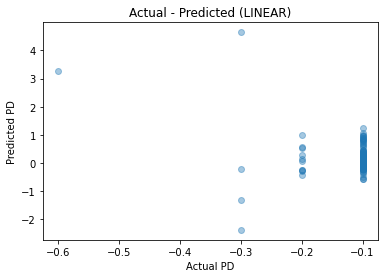

In [42]:
plt.scatter(y_test, y_pred_linear, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (LINEAR)')
plt.show()

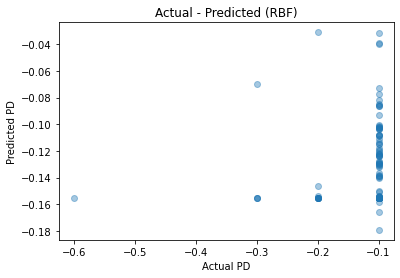

In [41]:
plt.scatter(y_test, y_pred_rbf, alpha = 0.4)
plt.xlabel('Actual PD')
plt.ylabel('Predicted PD')
plt.title('Actual - Predicted (RBF)')
plt.show()

In [38]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
rmse_linear

0.8100945236844229

In [39]:
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
rmse_rbf = np.sqrt(mse_rbf)
rmse_rbf

0.0704534516854727